In [7]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_statistics_data(experiments_path, runs):
    paths = [f"{experiments_path}/run_{run}/statistics" for run in runs]
    files = []
    for path in paths:
        files += os.listdir(path)
    dataframes = []
    for f in files:
        try:
            df = pd.read_csv(f"{path}/{f}", delimiter='\t')
            df['generation'] = int(f.split(os.sep)[-1].replace('generation_','').replace('.csv',''))
            dataframes.append(df)
        except:
            pass
    return pd.concat(dataframes).reset_index(drop=True)
    

# Experimentation

blue line -> average at generation level

orange line -> only the best individual of each generation

## Barlow Twins

Detalhes:
- Fitness: accuracy
- geracoes: 10, embora por algum motivo nao tenha a informacao da ultima
- lambda: 5
- mutacoes: ver config

In [3]:
experiments_path = "experiments_bt"
runs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
stats_df = read_statistics_data(experiments_path, runs)
best_individual_stats_df = stats_df.loc[stats_df.groupby("generation")["fitness"].idxmax()]

In [10]:
best_individual_stats_df

,id,phenotype,fitness,num_epochs,training_time_spent,training_time,is_valid_solution,fitness.1,n_trainable_parameters,n_layers,training_time_spent.1,validation_losses,n_epochs,generation
22,4,layer:dropout rate:0.4871917201768733 input:-1...,0.107576,15,62.505373,60,True,0.107576,67610828,6,62.505373,[],15,0
24,1,layer:dropout rate:0.4871917201768733 input:-1...,0.173906,45,62.539889,120,True,0.173906,67610828,6,62.539889,[],30,1
17,5,layer:dropout rate:0.4871917201768733 input:-1...,0.166162,105,62.598791,180,True,0.166162,67610828,6,62.598791,[],60,2
8,2,layer:dropout rate:0.4871917201768733 input:-1...,0.166162,210,1.617430,240,True,0.166162,67610828,6,1.617430,[],105,3
36,1,layer:dropout rate:0.4871917201768733 input:-1...,0.166162,420,1.638885,300,True,0.166162,67610828,6,1.638885,[],210,4
30,1,layer:dropout rate:0.4871917201768733 input:-1...,0.166162,840,1.643775,360,True,0.166162,67610828,6,1.643775,[],420,5
43,2,layer:dropout rate:0.4871917201768733 input:-1...,0.166162,1680,1.690372,420,True,0.166162,67610828,6,1.690372,[],840,6
48,1,layer:dropout rate:0.4871917201768733 input:-1...,0.166162,3360,1.706207,480,True,0.166162,67610828,6,1.706207,[],1680,7
1,1,layer:batch_norm input:-1 layer:pool_avg kerne...,0.181414,15,62.725689,60,True,0.181414,67250476,7,62.725689,[],15,8


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8')]

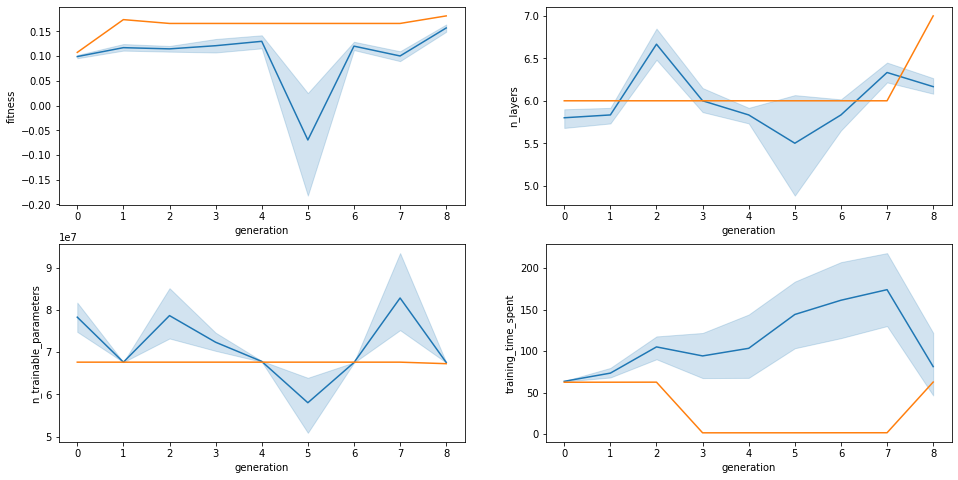

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

xticks = sorted(stats_df['generation'].unique())

sns.lineplot(x='generation', y='fitness', data=stats_df, ax=axs[0][0])
axs[0][0].set_xticks(xticks)
axs[0][0].set_xticklabels(xticks)
sns.lineplot(x='generation', y='fitness', data=best_individual_stats_df, ax=axs[0][0])
axs[0][0].set_xticks(xticks)
axs[0][0].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_layers', data=stats_df, ax=axs[0][1])
axs[0][1].set_xticks(xticks)
axs[0][1].set_xticklabels(xticks)
sns.lineplot(x='generation', y='n_layers', data=best_individual_stats_df, ax=axs[0][1])
axs[0][1].set_xticks(xticks)
axs[0][1].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_trainable_parameters', data=stats_df, ax=axs[1][0])
axs[1][0].set_xticks(xticks)
axs[1][0].set_xticklabels(xticks)
sns.lineplot(x='generation', y='n_trainable_parameters', data=best_individual_stats_df, ax=axs[1][0])
axs[1][0].set_xticks(xticks)
axs[1][0].set_xticklabels(xticks)


sns.lineplot(x='generation', y='training_time_spent', data=stats_df, ax=axs[1][1])
axs[1][1].set_xticks(xticks)
axs[1][1].set_xticklabels(xticks)
sns.lineplot(x='generation', y='training_time_spent', data=best_individual_stats_df, ax=axs[1][1])
axs[1][1].set_xticks(xticks)
axs[1][1].set_xticklabels(xticks)

## Normal fast denser

In [14]:
experiments_path = "experiments"
runs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [17]:
stats_df = read_statistics_data(experiments_path, runs)
best_individual_stats_df = stats_df.loc[stats_df.groupby("generation")["fitness"].idxmax()]

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

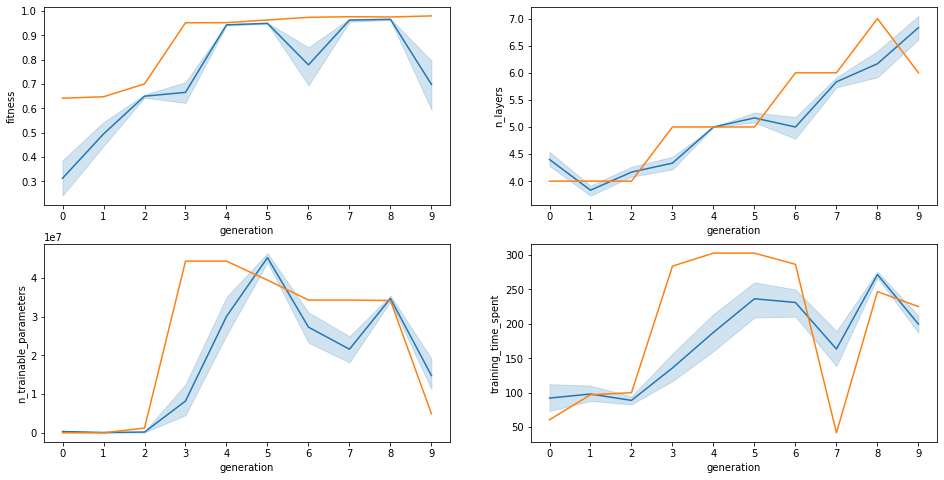

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

xticks = sorted(stats_df['generation'].unique())

sns.lineplot(x='generation', y='fitness', data=stats_df, ax=axs[0][0])
axs[0][0].set_xticks(xticks)
axs[0][0].set_xticklabels(xticks)
sns.lineplot(x='generation', y='fitness', data=best_individual_stats_df, ax=axs[0][0])
axs[0][0].set_xticks(xticks)
axs[0][0].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_layers', data=stats_df, ax=axs[0][1])
axs[0][1].set_xticks(xticks)
axs[0][1].set_xticklabels(xticks)
sns.lineplot(x='generation', y='n_layers', data=best_individual_stats_df, ax=axs[0][1])
axs[0][1].set_xticks(xticks)
axs[0][1].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_trainable_parameters', data=stats_df, ax=axs[1][0])
axs[1][0].set_xticks(xticks)
axs[1][0].set_xticklabels(xticks)
sns.lineplot(x='generation', y='n_trainable_parameters', data=best_individual_stats_df, ax=axs[1][0])
axs[1][0].set_xticks(xticks)
axs[1][0].set_xticklabels(xticks)


sns.lineplot(x='generation', y='training_time_spent', data=stats_df, ax=axs[1][1])
axs[1][1].set_xticks(xticks)
axs[1][1].set_xticklabels(xticks)
sns.lineplot(x='generation', y='training_time_spent', data=best_individual_stats_df, ax=axs[1][1])
axs[1][1].set_xticks(xticks)
axs[1][1].set_xticklabels(xticks)